In [12]:
import pandas as pd
import numpy as np
import scipy as sp
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
%matplotlib inline

In [13]:
# Read Train and Test dataset
data_train = pd.read_csv(r"C:\Users\HP\Desktop\Oreilly\Blue Team\Intrusion Detection/KDDTrain+.txt")
data_test = pd.read_csv(r"C:\Users\HP\Desktop\Oreilly\Blue Team\Intrusion Detection/KDDTest+.txt")

In [14]:
data_train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [15]:
data_train.describe()

,0,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,25,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,20
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [16]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'outcome'
,'level'])

In [17]:
data_train.columns = columns
data_test.columns  = columns

# Choose categorical columns to remove because PCA show good performance with numeric data
columns_drop = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level']

data_train.drop(columns_drop, axis=1, inplace=True)
data_train.shape

(125972, 35)

In [18]:
data_train.head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,232,8153,0,0,0,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,199,420,0,0,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,0,0,0,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [19]:
# Get all normal data to train
data_train_normal = data_train[data_train['outcome']=='normal'].copy()
data_train_normal.shape

# Remove label before training
data_train_normal.drop(columns=['outcome'], axis=1, inplace=True)
data_train_normal.head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,146,0,0,0,0,0,0,0,0,...,255,1,0.0,0.6,0.88,0.00,0.00,0.00,0.0,0.00
2,0,232,8153,0,0,0,0,0,0,0,...,30,255,1.0,0.0,0.03,0.04,0.03,0.01,0.0,0.01
3,0,199,420,0,0,0,0,0,0,0,...,255,255,1.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00
11,0,287,2251,0,0,0,0,0,0,0,...,8,219,1.0,0.0,0.12,0.03,0.00,0.00,0.0,0.00
15,0,300,13788,0,0,0,0,0,0,0,...,91,255,1.0,0.0,0.01,0.02,0.00,0.00,0.0,0.00


In [20]:
data_test.drop(columns_drop, axis=1, inplace=True)
data_test.shape

(22543, 35)

In [21]:
# Get all normal and  abnormal data for accuracy estimation later easier
data_test_normal = data_test[data_test['outcome']=='normal'].copy()
data_test_abnormal = data_test[data_test['outcome']!='normal'].copy()
data_test_normal.drop(columns=['outcome'], axis=1, inplace=True)
data_test_abnormal.drop(columns=['outcome'], axis=1, inplace=True)
data_test_normal.shape, data_test_abnormal.shape

((9711, 34), (12832, 34))

In [22]:
# Define the score function for abnormal detection
def anomalyScores(originalDF, reducedDF):
  loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1)
  loss = pd.Series(data=loss,index=originalDF.index)
  loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
  return loss

In [23]:
df_train = data_train_normal.copy()
df_test = pd.concat([data_test_normal, data_test_abnormal])
df_test.columns = data_test_normal.columns

In [24]:
# Standardization over Testing
scaler = StandardScaler()
scaler.fit(df_train)
df_test = pd.DataFrame(scaler.transform(df_test))
df_test.columns = data_test_normal.columns

In [25]:
from sklearn.decomposition import PCA
def perform_pca(df_train, df_test):
  pca = PCA(0.9)
  pca.fit(scaler.transform(df_train))
  # we don't use built-in fit_transform() since we fit on train and transform over test. In fact, we can fit(df_train) and transform(df_test) as well.
  # source code: https://github.com/scikit-learn/scikit-learn/blob/baf0ea25d/sklearn/decomposition/_pca.py#L411
  # df_test_PCA_manual = (df_test-scaler.mean_).dot(pca.components_.T)
  # df_test_PCA_inverse_manual = df_test_PCA_manual.dot(pca.components_) + scaler.mean_
  df_test_PCA = pca.transform(df_test)
  df_test_PCA_inverse = pca.inverse_transform(df_test_PCA)
  df_test_PCA = pd.DataFrame(df_test_PCA)
  df_test_PCA_inverse = pd.DataFrame(df_test_PCA_inverse)
  print(pca.components_.shape)
  return df_test_PCA, df_test_PCA_inverse

In [26]:
# Centralized PCA: Obtain dataframe of groundTrue and anomalyScore using PCA.fit(df_train)
df_test_PCA, df_test_PCA_inverse = perform_pca(df_train, df_test)
abnormal_score = anomalyScores(df_test, df_test_PCA_inverse)
df_gt_score_PCA = pd.DataFrame(); df_gt_pred_PCA = pd.DataFrame()
df_gt_score_PCA['ground_true'] = np.concatenate([np.zeros(len(data_test_normal)), np.ones(len(data_test_abnormal))])
df_gt_score_PCA['anomalyScore'] = abnormal_score

(19, 34)


C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:435: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [27]:
from sklearn.metrics import classification_report, confusion_matrix

def results_analysis(df_gt_score, threshold, log=0):
  df_gt_pred = pd.DataFrame()
  df_gt_pred['ground_true'] = df_gt_score['ground_true']
  index = df_gt_score['anomalyScore'] > threshold
  df_gt_pred['prediction'] = index.astype(int)

  TN, FP, FN, TP = confusion_matrix(df_gt_pred['ground_true'], df_gt_pred['prediction']).ravel()
  precision_score = TP/(FP + TP)
  recall_score = TP/(FN + TP)
  accuracy_score = (TP + TN)/ (TP + FN + TN + FP)
  f1_score = 2*precision_score*recall_score/(precision_score + recall_score)
  fpr = FP / (FP+TN) # False positive rate (FPR); False Alarm = FP/N

  if log:
    # print(classification_report(df_gt_pred['ground_true'], df_gt_pred['prediction']))
    print(f"Precision: {np.round(precision_score * 100.0,4)}%")
    print(f"Recall: {np.round(recall_score * 100.0,4)}%")
    print(f"Accuracy score: {np.round(accuracy_score * 100.0,4)}%")
    print(f"F1 score: {np.round(f1_score * 100.0,4)}%")
    print(f"False alarm: {np.round(fpr * 100.0,4)}%")

  return precision_score, recall_score, accuracy_score, f1_score, fpr

In [28]:
lst_rho = np.linspace(0.0001,0.001,10)
print(lst_rho)
df = pd.DataFrame(np.zeros((len(lst_rho),6)))
df.columns = ['rho','precision_score', 'recall_score', 'accuracy_score', 'f1_score', 'fpr']
for i, rho in enumerate(lst_rho):
  precision_score, recall_score, accuracy_score, f1_score, fpr = results_analysis(df_gt_score_PCA, threshold=rho, log=0)
  df.iloc[i,0] = rho
  df.iloc[i,1:] = precision_score, recall_score, accuracy_score, f1_score, fpr

[0.0001 0.0002 0.0003 0.0004 0.0005 0.0006 0.0007 0.0008 0.0009 0.001 ]


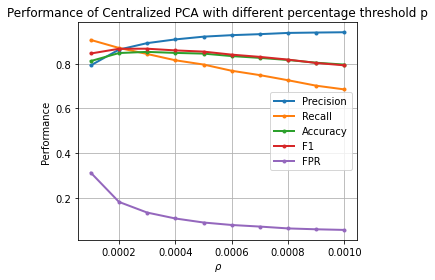

In [29]:
plt.figure(figsize=(5, 4));
plt.plot(df['rho'], df['precision_score'], '.-', label=('Precision'), linewidth=2)#, style='--')
plt.plot(df['rho'], df['recall_score'], '.-', label=('Recall'), linewidth=2)#, style='--')
plt.plot(df['rho'], df['accuracy_score'],'.-', label=('Accuracy'), linewidth=2)
plt.plot(df['rho'], df['f1_score'],'.-', label=('F1'), linewidth=2)
plt.plot(df['rho'], df['fpr'],'.-', label=('FPR'), linewidth=2)
plt.xlabel(r'$\rho$')
plt.ylabel('Performance')
plt.legend()
plt.grid()
plt.title("Performance of Centralized PCA with different percentage threshold p")
plt.show()

In [30]:
precision_score, recall_score, accuracy_score, f1_score, fpr = results_analysis(df_gt_score_PCA, threshold=0.0003, log=1)

Precision: 89.2763%
Recall: 84.4062%
Accuracy score: 85.3524%
F1 score: 86.773%
False alarm: 13.3972%


#  Other Approach

In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,RocCurveDisplay,ConfusionMatrixDisplay,confusion_matrix,roc_auc_score,accuracy_score
from catboost import CatBoostClassifier
from sklearn.ensemble import (AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier,VotingClassifier)
from IPython.display import clear_output
from sklearn import model_selection

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn import preprocessing
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import os, psutil

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


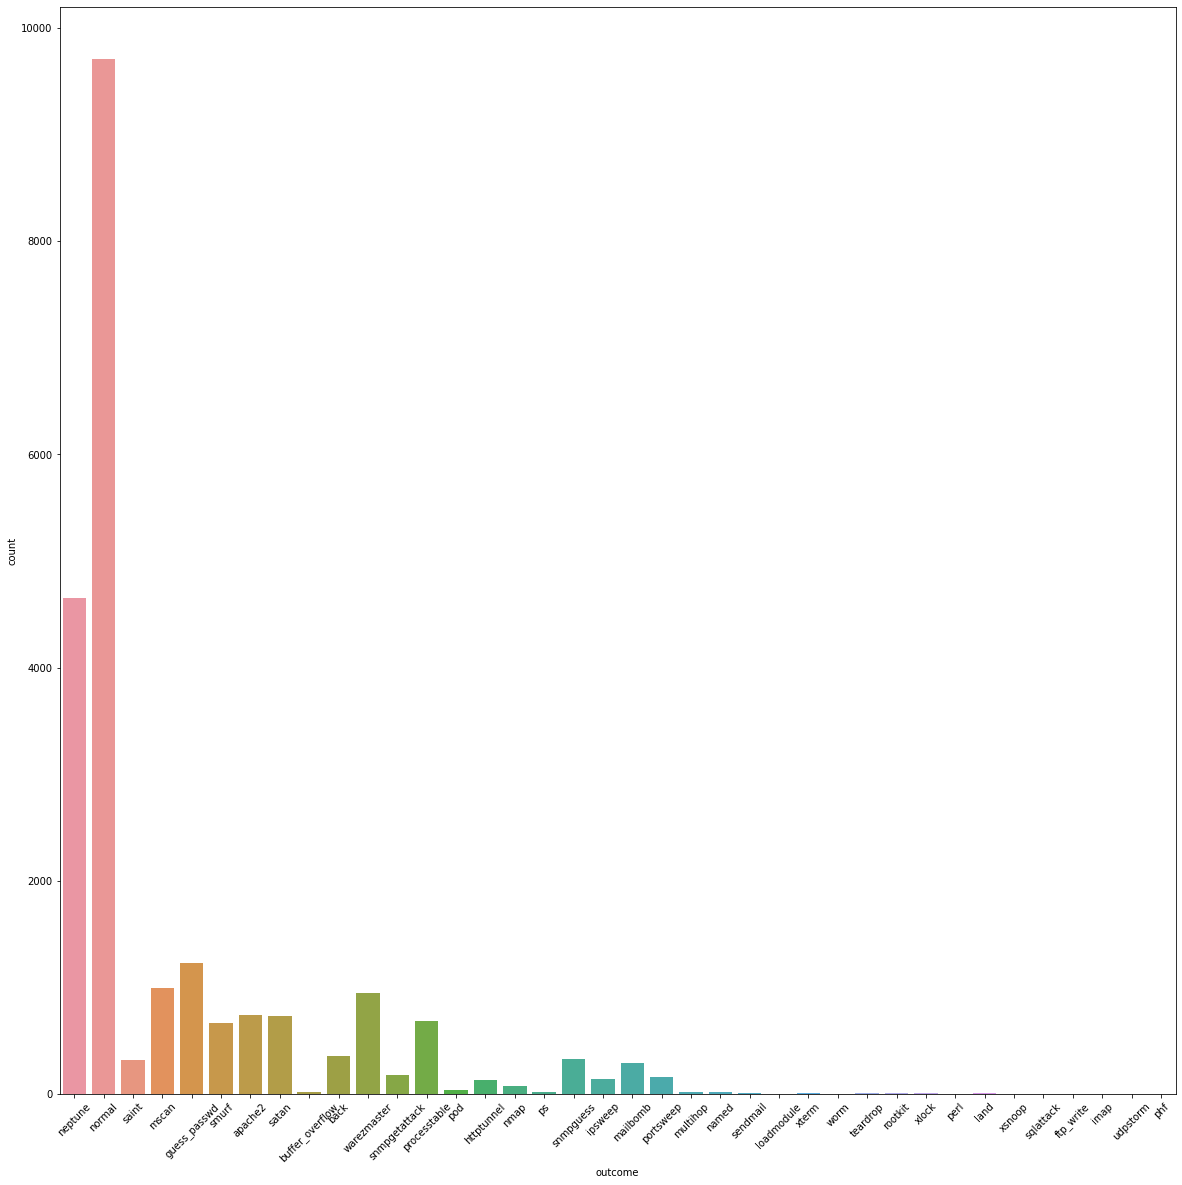

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

data_train = pd.read_csv(r"C:\Users\HP\Desktop\Oreilly\Blue Team\Intrusion Detection/KDDTrain+.txt")
data_test = pd.read_csv(r"C:\Users\HP\Desktop\Oreilly\Blue Team\Intrusion Detection/KDDTest+.txt")

data_train.columns = columns
data_test.columns = columns

plt.figure(figsize=(20,20))
sns.countplot(data_test['outcome'])
plt.xticks(rotation = 45)
plt.show()

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_train['protocol_type'] = le.fit_transform(data_train['protocol_type'])
data_test['protocol_type'] = le.transform(data_test['protocol_type'])
data_train['service'] = le.fit_transform(data_train['service'])
data_test['service'] =le.transform(data_test['service'])
data_train['flag'] = le.fit_transform(data_train['flag'])
data_test['flag'] = le.transform(data_test['flag'])

In [46]:
label = []
for i in data_train.outcome :
  if i == 'normal':
    label.append(0)
  else:
    label.append(1)
data_train['label'] = label 

In [47]:
label_test = []
for i in data_test.outcome :
  if i == 'normal':
    label_test.append(0)
  else:
    label_test.append(1)
data_test['label'] = label_test

In [48]:
data_train.drop('outcome',axis = 1,inplace = True)
data_test.drop('outcome',axis = 1,inplace = True)

In [50]:
data_test["kfold"] = -1
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=666)
for fold, (train_indicies, valid_indicies) in enumerate(kf.split(X=data_test)):
    data_test.loc[valid_indicies, "kfold"] = fold
features = [x for x in data_test.columns.values if x[0]=="f"]

In [51]:
useful_features = [c for c in data_test.columns if c not in ("label", "kfold")]

In [54]:
import optuna
from sklearn import preprocessing
from xgboost import XGBClassifier
import xgboost as xgb
def run(trial):
    fold = 0

    xtrain = data_test[data_test.kfold != fold].reset_index(drop=True)
    xvalid = data_test[data_test.kfold == fold].reset_index(drop=True)

    ytrain = xtrain.label
    yvalid = xvalid.label

    xtrain = xtrain[useful_features]
    xvalid = xvalid[useful_features]

    param={
        
        'max_depth' : trial.suggest_int('max_depth',2,10),
        'n_estimators' : trial.suggest_int('n_estimators',100,3000)
        
    }
    model = RandomForestClassifier(
       **param
    )
    model.fit(xtrain, ytrain)
    preds_valid = model.predict(xvalid)
    acc = accuracy_score(yvalid, preds_valid)
    return acc

In [55]:
study = optuna.create_study(direction="minimize")
study.optimize(run, n_trials=5)

[I 2022-08-08 17:16:38,446] A new study created in memory with name: no-name-c4aaf944-8540-4900-ad3d-ccc526ae088a
[I 2022-08-08 17:16:45,763] Trial 0 finished with value: 0.9782656908405412 and parameters: {'max_depth': 5, 'n_estimators': 533}. Best is trial 0 with value: 0.9782656908405412.
[I 2022-08-08 17:17:22,087] Trial 1 finished with value: 0.992903082723442 and parameters: {'max_depth': 10, 'n_estimators': 1973}. Best is trial 0 with value: 0.9782656908405412.
[I 2022-08-08 17:17:30,918] Trial 2 finished with value: 0.9673985362608117 and parameters: {'max_depth': 4, 'n_estimators': 771}. Best is trial 2 with value: 0.9673985362608117.
[I 2022-08-08 17:17:38,153] Trial 3 finished with value: 0.9223774672876469 and parameters: {'max_depth': 2, 'n_estimators': 931}. Best is trial 3 with value: 0.9223774672876469.
[I 2022-08-08 17:18:18,473] Trial 4 finished with value: 0.992903082723442 and parameters: {'max_depth': 10, 'n_estimators': 2564}. Best is trial 3 with value: 0.9223774

In [56]:
study.best_params

{'max_depth': 2, 'n_estimators': 931}

Fold :  0
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      7684
           1       0.97      1.00      0.98     10350

    accuracy                           0.98     18034
   macro avg       0.98      0.98      0.98     18034
weighted avg       0.98      0.98      0.98     18034



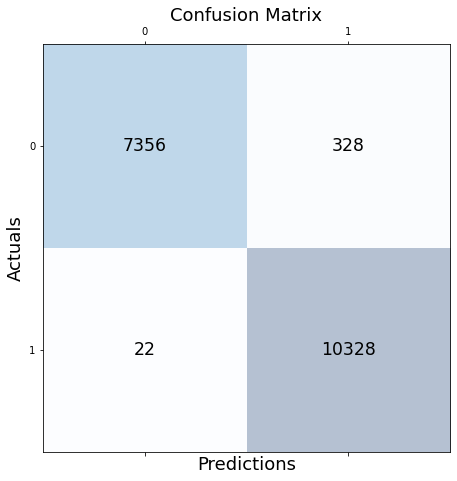

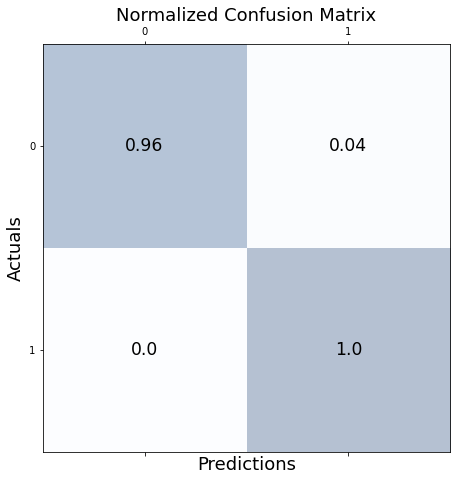

Accuracy of the  0  fold:  0.9805922147055561
F1 Score of the  0  fold:  0.9833380938779397
Recall Score of the  0  fold:  0.9978743961352657

Fold :  1
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      7788
           1       0.97      1.00      0.98     10246

    accuracy                           0.98     18034
   macro avg       0.98      0.98      0.98     18034
weighted avg       0.98      0.98      0.98     18034



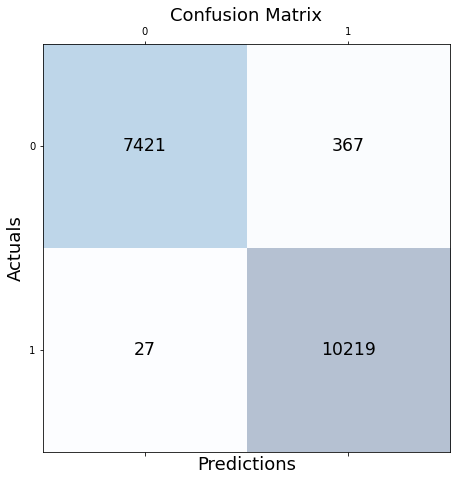

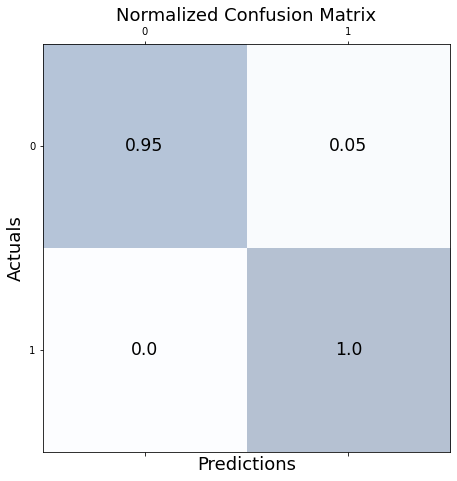

Accuracy of the  1  fold:  0.978152378839969
F1 Score of the  1  fold:  0.9810867895545315
Recall Score of the  1  fold:  0.9973648252976771

Fold :  2
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      7823
           1       0.96      1.00      0.98     10211

    accuracy                           0.98     18034
   macro avg       0.98      0.97      0.98     18034
weighted avg       0.98      0.98      0.98     18034



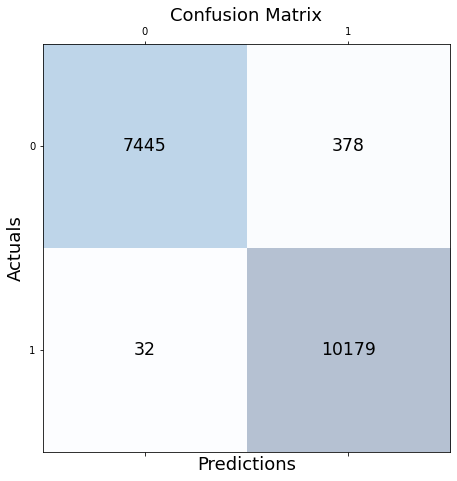

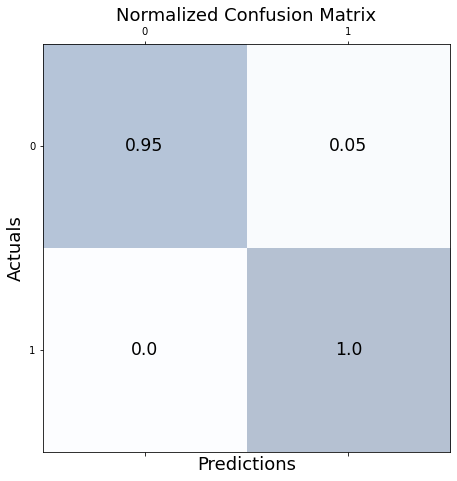

Accuracy of the  2  fold:  0.9772651657979372
F1 Score of the  2  fold:  0.9802580893682589
Recall Score of the  2  fold:  0.9968661247674077

Fold :  3
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      7776
           1       0.96      1.00      0.98     10259

    accuracy                           0.98     18035
   macro avg       0.98      0.97      0.98     18035
weighted avg       0.98      0.98      0.98     18035



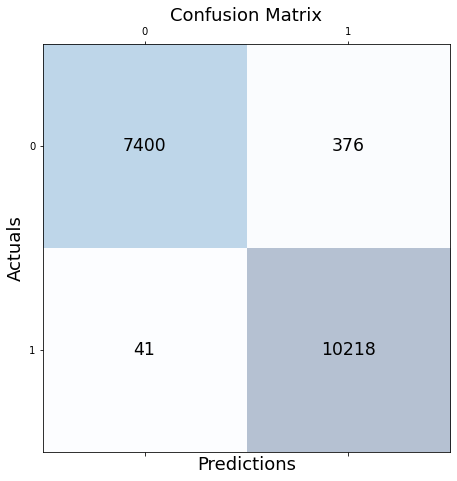

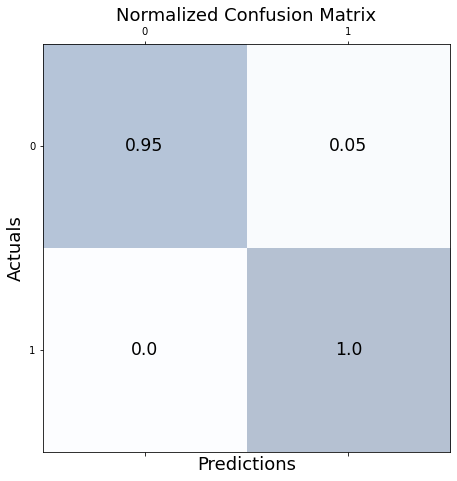

Accuracy of the  3  fold:  0.9768782922095924
F1 Score of the  3  fold:  0.9800028772838439
Recall Score of the  3  fold:  0.9960035091139487

Fold :  4
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      7773
           1       0.97      1.00      0.98     10262

    accuracy                           0.98     18035
   macro avg       0.98      0.98      0.98     18035
weighted avg       0.98      0.98      0.98     18035



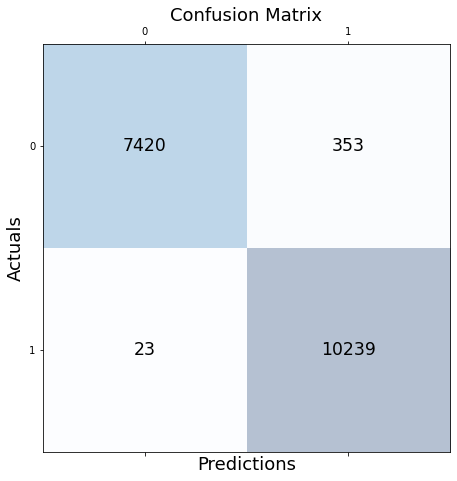

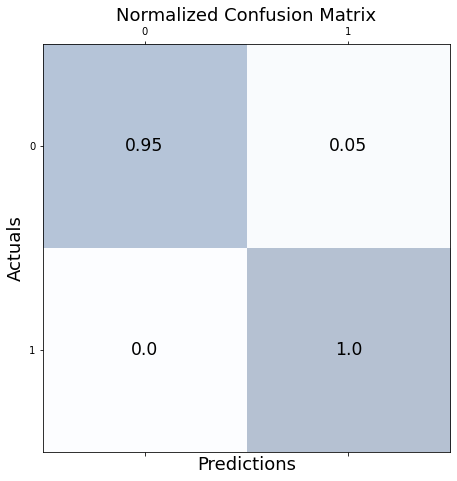

Accuracy of the  4  fold:  0.97915164957028
F1 Score of the  4  fold:  0.9819698858732138
Recall Score of the  4  fold:  0.9977587214967842

======================== The Summary ====================================
Accuracy of the model:  0.978407940224667
F1 Score of the model:  0.9813311471915576
Recall Score of the : 0.9971735153622167


In [58]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, recall_score
import sklearn.metrics as metrics
acc = []
f1 = []
recall = []
for fold in range(5):
    xtrain =  data_test[data_test.kfold != fold].reset_index(drop=True)
    xvalid = data_test[data_test.kfold == fold].reset_index(drop=True)
    xtest = data_test.copy()
    
    ytrain = xtrain.label
    yvalid = xvalid.label
    
    xtrain = xtrain[useful_features]
    xvalid = xvalid[useful_features]
    
    param={'max_depth': 5, 'n_estimators': 2484}

    
    model = RandomForestClassifier(**param)
    model.fit(xvalid, yvalid)
    preds_valid = model.predict(xtrain)
    report = classification_report(ytrain, preds_valid)
    
    print("Fold : ",fold)
    print(report)
    conf_matrix = confusion_matrix(ytrain, preds_valid)
    nor_matrix = conf_matrix / conf_matrix.astype(np.float).sum(axis=1, keepdims=True)
    nor_matrix = nor_matrix.round(2)
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
          for j in range(conf_matrix.shape[1]):
              ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
  
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(nor_matrix , cmap=plt.cm.Blues, alpha=0.3)
    for i in range(nor_matrix .shape[0]):
          for j in range(nor_matrix .shape[1]):
              ax.text(x=j, y=i,s=nor_matrix [i, j], va='center', ha='center', size='xx-large')
  
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Normalized Confusion Matrix', fontsize=18)
    plt.show()
    print("="*60)
    
    acc_score = accuracy_score(ytrain, preds_valid)
    f1_scores = f1_score(ytrain, preds_valid)
    recall_scores = recall_score(ytrain, preds_valid)
    
    acc.append(acc_score)
    f1.append(f1_scores)
    recall.append(recall_scores)
    
    print("Accuracy of the ",fold," fold: ",acc_score)
    print("F1 Score of the ",fold," fold: ",f1_scores)
    print("Recall Score of the ",fold," fold: ",recall_scores)
    print("============================================================")
    print("")
    
print("======================== The Summary ====================================")
print("Accuracy of the model: ",np.mean(acc))
print("F1 Score of the model: ",np.mean(f1))
print("Recall Score of the :",np.mean(recall))    
print("=========================================================================")